In [26]:
!pip install tflite-model-maker


In [37]:
import os

import numpy as np

import tensorflow as tf
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt



In [34]:
print(tf.config.list_physical_devices('GPU'))

[]


In [35]:
ds_path = "D:\\UsX\\Escritorio\\letras_dataset2"

In [36]:
data_set = DataLoader.from_folder(ds_path)

INFO:tensorflow:Load image with size: 22500, num_label: 9, labels: A, B, C, D, E, F, G, H, I.


INFO:tensorflow:Load image with size: 22500, num_label: 9, labels: A, B, C, D, E, F, G, H, I.


In [38]:
train_data, test_data = data_set.split(0.9)
test_data, val_data = test_data.split(0.5)

In [39]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(ds_path.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data_set.index_to_label[label.numpy()])
plt.show()

AttributeError: 'str' object has no attribute 'gen_dataset'

<Figure size 1000x1000 with 0 Axes>

In [40]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_2 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1280)              0         
                                                                 
 dense_2 (Dense)             (None, 9)                 11529     
                                                                 
Total params: 3,424,553
Trainable params: 11,529
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


C:\Users\UsX\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


632/632 [==============================] - 386s 607ms/step - loss: 0.8747 - accuracy: 0.9001
Epoch 2/5
632/632 [==============================] - 381s 602ms/step - loss: 0.6776 - accuracy: 0.9689
Epoch 3/5
632/632 [==============================] - 327s 517ms/step - loss: 0.6467 - accuracy: 0.9754
Epoch 4/5
632/632 [==============================] - 330s 522ms/step - loss: 0.6316 - accuracy: 0.9770
Epoch 5/5
632/632 [==============================] - 321s 508ms/step - loss: 0.6239 - accuracy: 0.9799


36/36 [==============================] - 25s 524ms/step


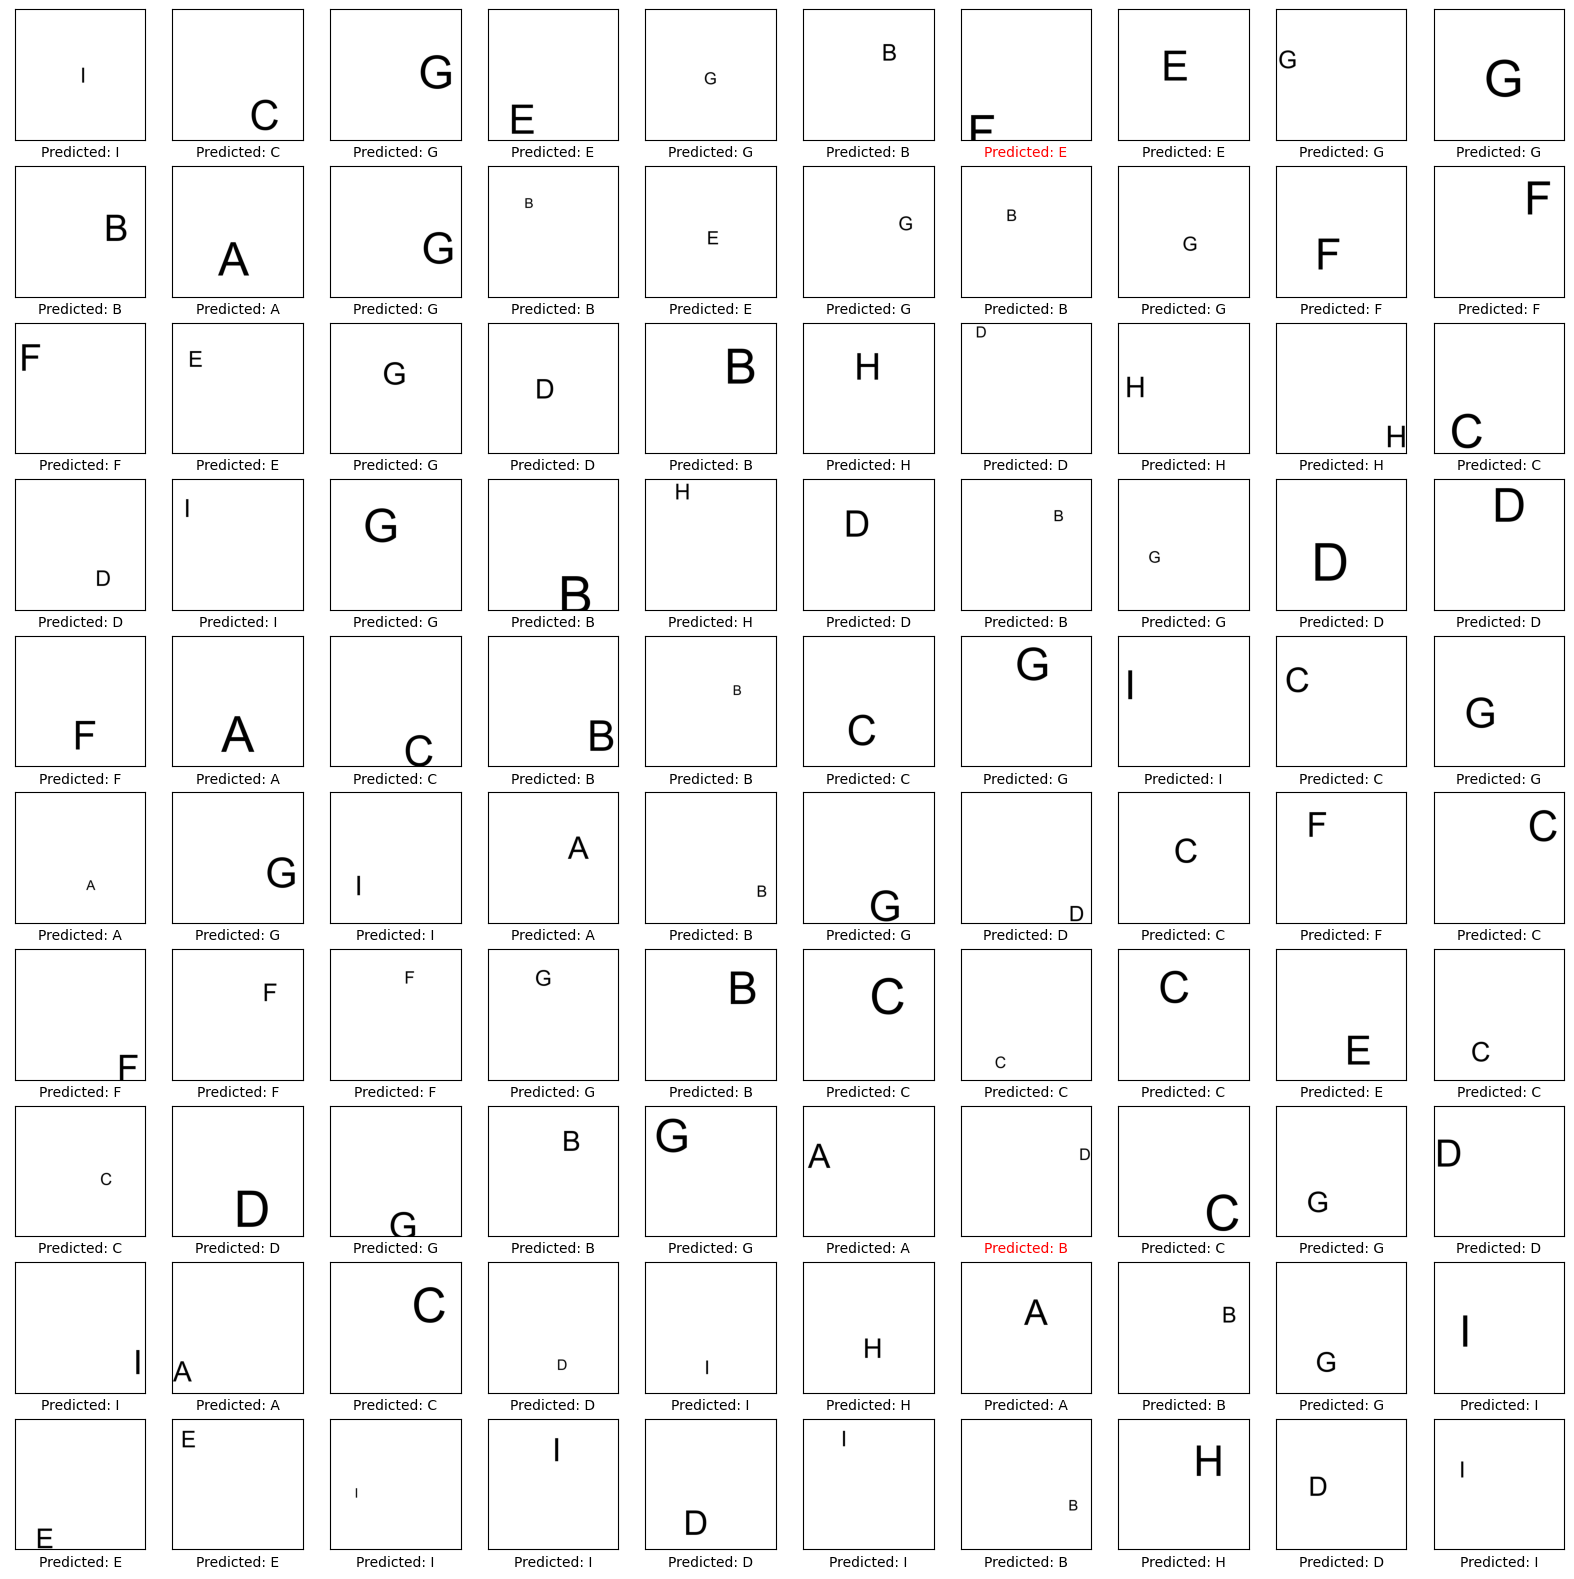

In [41]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

In [56]:
loss, accuracy = model.evaluate(test_data)

36/36 [==============================] - 26s 562ms/step - loss: 0.5995 - accuracy: 0.9822


In [58]:
model.export(export_dir='.')


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'C:\\Users\\UsX\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\~rapt\\_wrappers.cp38-win_amd64.pyd'
Check the permissions.



                                              0.0/100.6 kB ? eta -:--:--
     -------------------------------------- 100.6/100.6 kB 2.8 MB/s eta 0:00:00
                                              0.0/422.6 MB ? eta -:--:--
                                             0.9/422.6 MB 18.3 MB/s eta 0:00:24
                                             2.1/422.6 MB 26.7 MB/s eta 0:00:16
                                             3.1/422.6 MB 25.1 MB/s eta 0:00:17
                                             4.2/422.6 MB 24.3 MB/s eta 0:00:18
                                             5.2/422.6 MB 22.4 MB/s eta 0:00:19
                                             6.3/422.6 MB 22.3 MB/s eta 0:00:19
                                             6.3/422.6 MB 22.3 MB/s eta 0:00:19
                                             7.3/422.6 MB 20.4 MB/s eta 0:00:21
                                             8.4/422.6 MB 20.6 MB/s eta 0:00:21
                                             9.4/422.6

INFO:tensorflow:Assets written to: C:\Users\UsX\AppData\Local\Temp\tmp14l72t4u\assets
C:\Users\UsX\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


TypeError: EndVector() takes 1 positional argument but 2 were given

In [ ]:
model.evaluate_tflite('model.tflite', test_data)

NameError: name 'model' is not defined